In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat

In [109]:
mat=loadmat("ex5data1.mat")

In [105]:
x=mat['X']
xval=mat['Xval']
xtest=mat['Xtest']

In [106]:
y=mat['y']
yval=mat['yval']
ytest=mat['ytest']

In [46]:
def add_one(X):
    return np.insert(X,0,1,axis=1)
def add_dimention(X,degree):
    m=X.shape[0]
    ret=np.zeros([m,degree+1])
    for i in range(degree+1):
        ret[:,i]=np.squeeze(X)**i
    return ret
def get_meanstds(X):
    means=np.mean(X,axis=0)
    stds=np.std(X,axis=0,ddof=1)
    return means,stds

def norm(X,means,stds):
    X[:,1:]=X[:,1:]-means[1:]
    X[:,1:]=X[:,1:]/stds[1:]
    return X

# X:(m,n+1) theta:(n+1,1) y:(m,1)
def cost(theta,X,y,L):
    cost_pre=np.sum((X@theta-y)**2)
    reg=theta.T@theta
    return (cost_pre+L*reg)/(2*X.shape[0])

def gradient(theta,X,y,L):
    return (X.T@(X@theta-y)+L*theta)/X.shape[0]

def train(X,y,L,max_iter=5000,a=0.001):
    m,n=X.shape
    theta=np.zeros([n,1])
    J=np.zeros(max_iter)
    for i in range(max_iter):
        J[i]=cost(theta,X,y,L)
        grad=gradient(theta,X,y,L)
        theta=theta-a*grad
    return theta,J

def draw_result(theta,X,y):
    plt.scatter(X[:,1],y)
    plt.plot(X[:,1:],X@theta)
    plt.show()
    
def learning_curve(X,y,Xval,yval,L):
    train_err=np.zeros(X.shape[0])
    val_err=np.zeros(X.shape[0])
    for i in range(1,X.shape[0]+1):
        theta,_=train(X[:i],y[:i],L)
        train_err[i-1]=cost(theta,X[:i],y[:i],0)
        val_err[i-1]=cost(theta,Xval,yval,0)
    plt.plot(np.arange(X.shape[0]),train_err)
    plt.plot(np.arange(X.shape[0]),val_err)
    

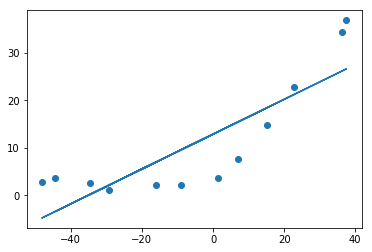

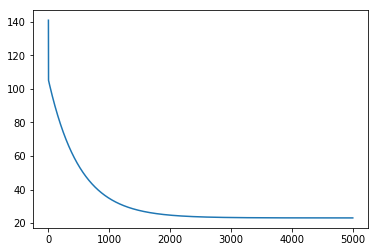

In [49]:
X=add_one(x)
Xval=add_one(xval)
theta,J=train(X,y,0.1)
draw_result(theta,X,y)
plt.plot(np.arange(5000),J)

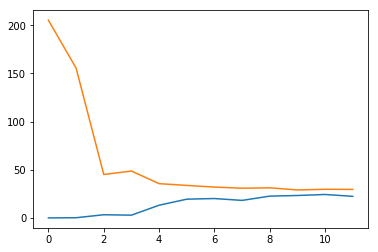

In [50]:
learning_curve(X,y,Xval,yval,0)#训练和验证集误差都高 欠拟合

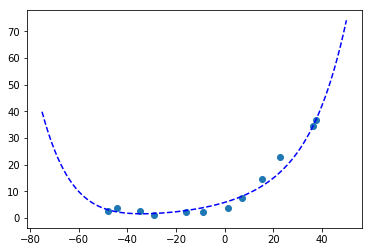

In [90]:
degree=6
X=add_dimention(x,degree)
means,stds=get_meanstds(X)
X_norm=norm(X,means,stds)

theta,J=train(X,y,0.3)
x_draw=np.linspace(-75,50,100)
X_draw=norm(add_dimention(x_draw,degree),means,stds)
plt.plot(x_draw,X_draw@theta,'b--')
plt.scatter(x,y)

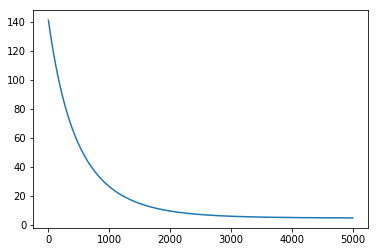

In [85]:
plt.plot(np.arange(5000),J)

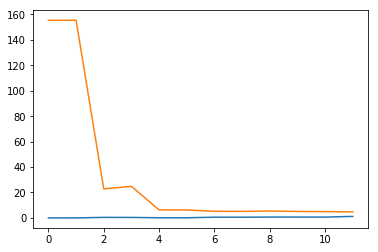

In [86]:
Xval_norm=norm(add_dimention(xval,degree),means,stds)
learning_curve(X_norm,y,Xval_norm,yval,0)#训练集和验证集误差都低，拟合较好

In [107]:
degree_list=[i for i in range(9)]
train_err=np.zeros(len(degree_list))
val_err=np.zeros(len(degree_list))
for i,degree in enumerate(degree_list):
    X=add_dimention(x,degree)
    means,stds=get_meanstds(X)
    X_norm=norm(X,means,stds)
    Xval_norm=norm(add_dimention(xval,degree),means,stds)
    theta,_=train(X,y,1)
    train_err[i]=cost(theta,X_norm,y,1)
    val_err[i]=cost(theta,Xval_norm,yval,1)

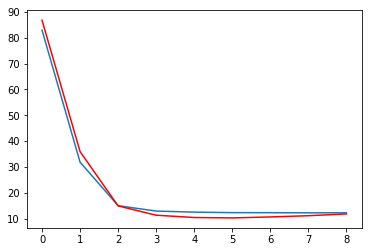

In [108]:
plt.plot(np.arange(len(L_list)),train_err)
plt.plot(np.arange(len(L_list)),val_err,'r')
#由图知degree选5时 验证集的误差最小